In [4]:
# %pip install transformers
# %pip install gradio
# %pip install timm
# %pip install torchvision

### Lab Segment Anything

The [Segment Anything Model (SAM)](https://segment-anything.com) model was released by Meta AI.

The full lab can be found at https://learn.deeplearning.ai/

In [ ]:
from transformers import pipeline

In [ ]:
sam_pipe = pipeline("mask-generation",
    "Zigeng/SlimSAM-uniform-77")

config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from PIL import Image
import requests

In [ ]:
url = "https://www.lalux.lu/fileadmin/_processed_/3/b/csm_1600x1024_Easylifepension_LandingPage_b8ae391df1.jpg"
# raw_image = Image.open(requests.get(url, stream=True).raw)
raw_image = Image.open('Media/Romain.jpg')
raw_image

In [ ]:
output = sam_pipe(raw_image, points_per_batch=32)

In [ ]:
from helper_Img_Seg import show_pipe_masks_on_image

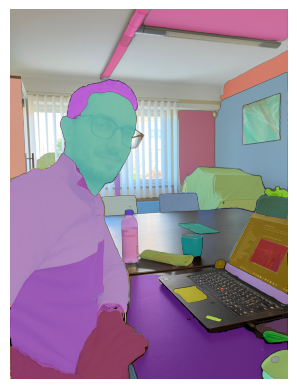

In [ ]:
show_pipe_masks_on_image(raw_image, output)

### Inférence à partir d'un point

In [ ]:
from transformers import SamModel, SamProcessor

In [ ]:
model = SamModel.from_pretrained(
    "Zigeng/SlimSAM-uniform-77")

processor = SamProcessor.from_pretrained(
    "Zigeng/SlimSAM-uniform-77")

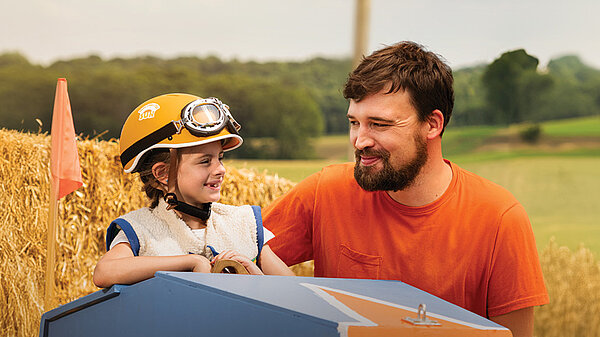

In [ ]:
url = "https://www.lalux.lu/fileadmin/_processed_/2/e/csm_Cover-Pic_spot_notoriete_092024_b58917bdd7.jpg"
raw_image = Image.open(requests.get(url, stream=True).raw)
# raw_image = Image.open("csm_Cover-Pic_spot_notoriete_092024_b58917bdd7.jpg")
raw_image

- Segmentation pour shirt orange
- Donnez les coordonnées d'un point situé dans la région (ex: t-shirt orange).

In [ ]:
input_points = [[[400, 250]]]

In [ ]:
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt")

In [ ]:
import torch

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [ ]:
len(predicted_masks)

1

In [ ]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

torch.Size([1, 3, 337, 600])

In [ ]:
outputs.iou_scores

tensor([[[0.9658, 0.9348, 0.9721]]])

In [ ]:
from helper_Img_Seg import show_mask_on_image

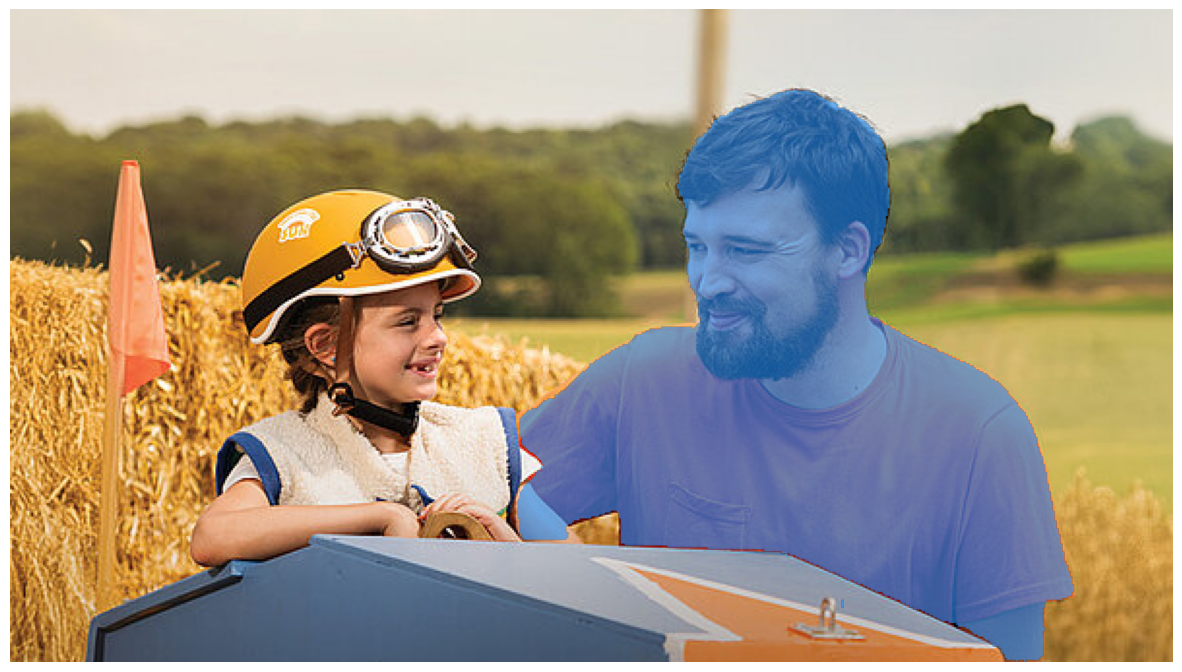

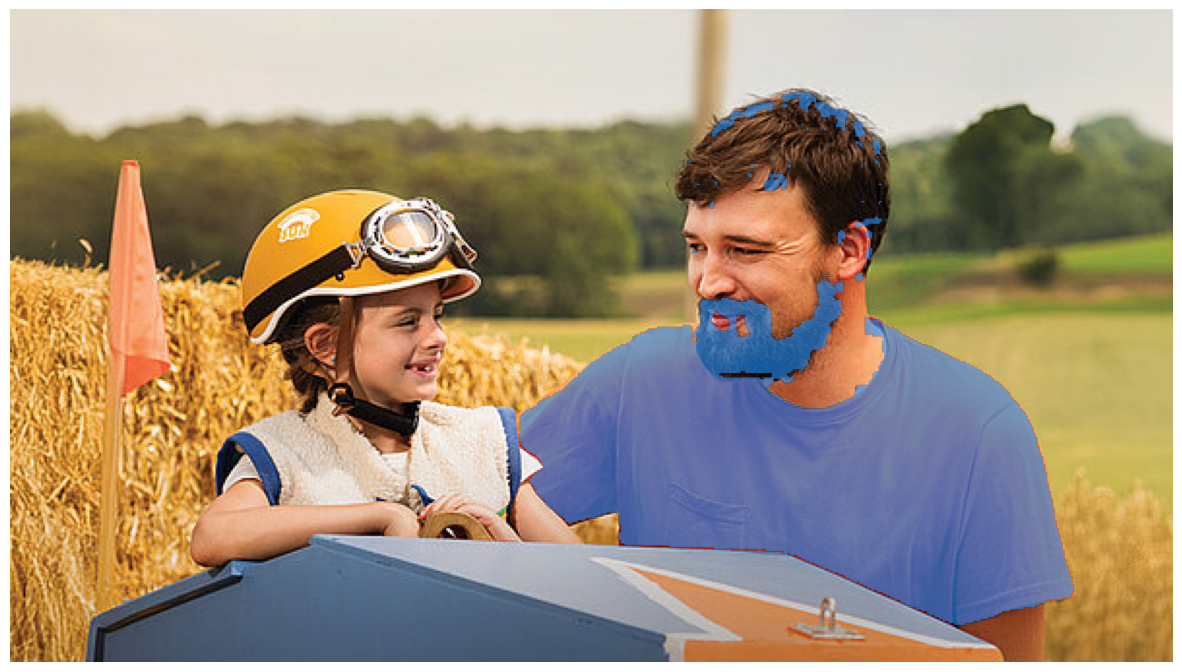

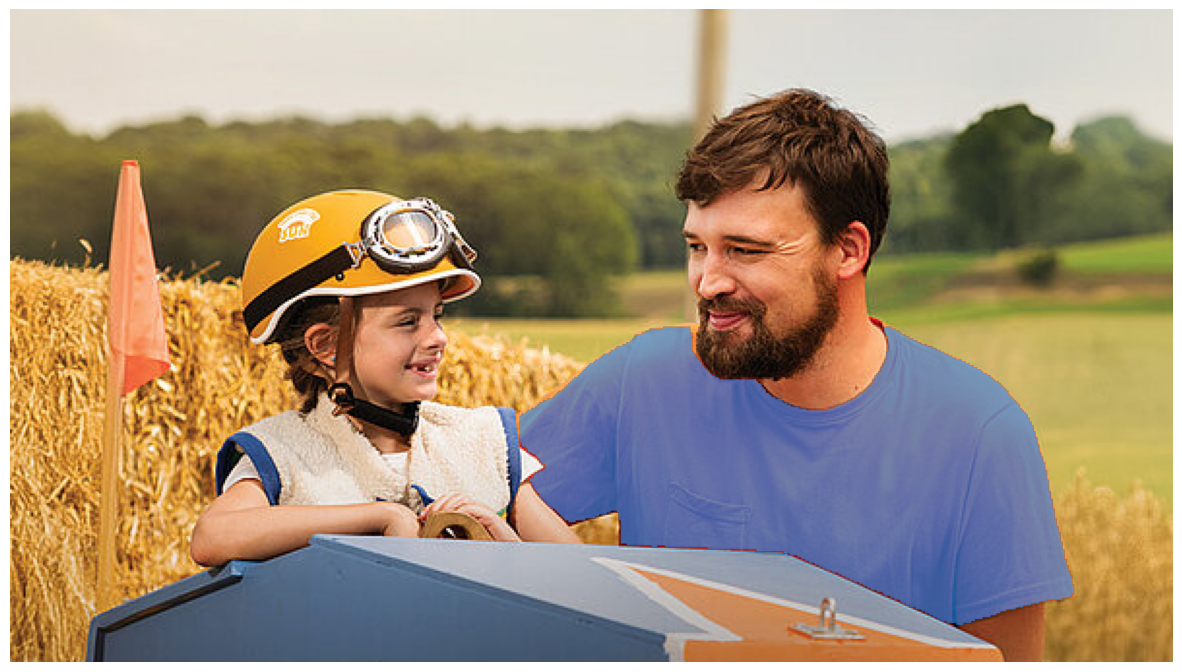

In [ ]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])